# 02. 파이토치 기초(PyTorch Basic)

## 01. 파이토치 패키지의 기본 구성
1. torch
   - 메인 네임스페이스
   - 텐서 등의 다양한 수학 함수
   - Numpy와 유사한 구조
1. torch.autograd
   - 자동 미분 함수들
   - enable_grad/no_grad : 자동 미분 on/off 제어 콘텍스트 매니저 
   - Function : 자체 미분 가능 함수 정의 기반 클래스  
1. torch.nn
   - 신경망 구축을 위한 다양한 데이터 구조, 레이어(RNN, LSTM..)
   - 활성화 함수 (ReLU..)
   - 손실 함수 (MSELoss..)
1. torch.optim
   - 파라미터 최적화 알고리즘 (확률적 경사 하강법, Stochastic Gradient Descent, SGD)
1. torch.utils.data
   - 미니 배치용 유틸리티 함수 (SGD 반복 연산 실행 )
1. torch.onnx
   - ONNX 포맷 모델 익스포트(export) 
   - ONNX(Open Neural Network Exchange): 딥러닝 프레임워크 간 모델 공유 포맷

## 02. Tensor Manipulation
### 1. Vector, Matrix, Tensor
---
    - 스칼라 : 차원이 없는 값
    - Vector : 1차원
    - Matrix : 2차원
    - Tensor : 3차원 이상 

    - 2D Tensor : (Batch, dim)
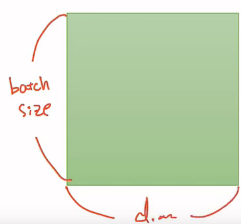

    - 3D Tensor : (Batch size, width, height) - Computer Vision
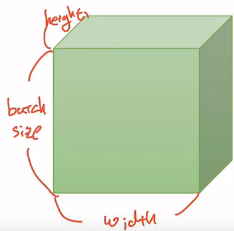

    - 3D Tensor : (Batch size, length, dim) - NLP
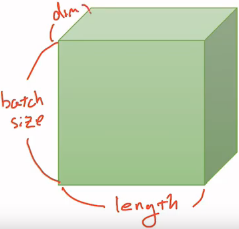

### 2. Numpy -> tensor 
---

In [2]:
import numpy as np

#### 1) Numpy 1D

In [10]:
t = np.array ([0., 1., 2., 3., 4., 5., 6.])
print(t)
print('Rank of t : ', t.ndim)
print('Shape of t: ', t.shape)

[0. 1. 2. 3. 4. 5. 6.]
Rank of t :  1
Shape of t:  (7,)


In [11]:
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1])

t[0] t[1] t[-1] =  0.0 1.0 6.0


In [12]:
print('t[2:5] t[4:-1]  = ', t[2:5], t[4:-1]) 

t[2:5] t[4:-1]  =  [2. 3. 4.] [4. 5.]


In [26]:
print('t[:2] t[3:]     = ', t[:2], t[3:])

t[:2] t[3:]     =  tensor([[1., 2., 3.],
        [4., 5., 6.]]) tensor([[10., 11., 12.]])


#### 2) Numpy 2D

In [14]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [15]:
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank  of t:  2
Shape of t:  (4, 3)


### 3. PyTorch Tensor allocation
---

In [3]:
import torch

#### 1) PyTorch 1D

In [17]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [18]:
print(t.dim())  # rank. 즉, 차원
print(t.shape)  # shape
print(t.size()) # shape

1
torch.Size([7])
torch.Size([7])


In [29]:
print(t[0], t[1], t[-1])  # 인덱스로 접근
print(t[2:5], t[4:-1])    # 슬라이싱
print(t[:2], t[3:])       # 슬라이싱

tensor([1., 2., 3.]) tensor([4., 5., 6.]) tensor([10., 11., 12.])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]]) tensor([], size=(0, 3))
tensor([[1., 2., 3.],
        [4., 5., 6.]]) tensor([[10., 11., 12.]])


#### 2) PyTorch 2D

In [20]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [21]:
print(t.dim())  # rank. 즉, 차원
print(t.size()) # shape

2
torch.Size([4, 3])


In [22]:
print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 것만 가져온다.
print(t[:, 1].size()) # ↑ 위의 경우의 크기

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [23]:
print(t[:, :-1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원에서는 맨 마지막에서 첫번째를 제외하고 다 가져온다.

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


#### 3) Broadcasting

In [30]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [31]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [32]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


### 4. 자주 사용되는 기능들
---
#### 1) Matricx Multiplication, Multiplication

In [33]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [34]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


#### 2) Mean

In [36]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [43]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.mean())
print(t.mean(dim=0))
print(t.mean(dim=1))
print(t.mean(dim=-1))

tensor([[1., 2.],
        [3., 4.]])
tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


#### 3) Sum

In [42]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1)) # 열을 제거

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


#### 4) Max, ArgMax

In [47]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.max())
print(t.max(dim=0))
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])
print(t.max(dim=1))
print(t.max(dim=-1))

tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


- Batch size: 훈련데이터의 개수가 굉장히 많을 때, 컴퓨터가 한 번에 들고가서 처리할 양
- 슬라이싱: https://wikidocs.net/13
- Pytorch Tensor: https://datascienceschool.net/view-notebook/4f3606fd839f4320a4120a56eec1e228/


#### 5) View (numpy.reshape)

- 기본적으로 변경 전과 변경 후의 원소 개수는 유지
- size = -1 다른 차원으로부터 해당 값을 유추

In [49]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


In [54]:
print(ft.view([-1,3]))
print(ft.view([-1,3]).shape) # (?,3) 크기로 변경 (4.3)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [55]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


#### 6) Squeeze - 1차원을 제거

In [58]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([0., 1., 2.])
torch.Size([3])


#### 7) Unsqueeze - 1차원 추가

In [63]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)
print(ft.view(1, -1))
print(ft.view(1, -1).shape)
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

torch.Size([3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


#### 8) Type Casting

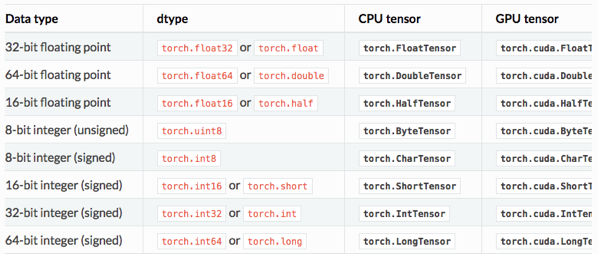



In [66]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)
print(lt.float())

tensor([1, 2, 3, 4])
tensor([1., 2., 3., 4.])


In [68]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


#### 8) Concatenate

In [7]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


#### 9) Stacking

In [9]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))
print(torch.stack([x, y, z], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


#### 10) Ones_like, zeros_like

In [11]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### 11) in-place operation

In [13]:
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


## 03. Class